In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [17]:
df = pd.read_csv('data/database.csv', sep=',')

In [18]:
# Filter regarding timestamps
df = df[((df['Time'] > '10:00:00') & (df['Time'] < '20:00:00') & \
     ((df['Time'] < '14:20:00') | (df['Time'] > '15:20:00')) & \
     (df['Date'] != '2017/12/24') & (df['Date'] != '2017/12/25'))]
df['Time'] = df['Time'].str.split(':').apply(lambda x: int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2]))

# Calculate averages and round values
df['S1_Temp'] = round((df['S1_Temp'] + df['S2_Temp'] + df['S3_Temp'] + df['S4_Temp'])/4, 3)
df['S1_Sound'] = round((df['S1_Sound'] * df['S2_Sound'] * df['S3_Sound'] * df['S4_Sound']) ** (1/4), 3)
df['S5_CO2_Slope'] = round(df['S5_CO2_Slope'], 3)

# Remove unneeded columns
df = df.drop(labels=['Date', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S2_Sound', 'S3_Sound', 'S4_Sound'], axis=1)

# Reorganize the DataFrame after modifications
df = df.rename(columns={"S1_Temp" : "Avg_Temp", "S1_Sound" : "Avg_Sound"})
df = df.reset_index(drop=1)

# Test print
df

,Time,Avg_Temp,S1_Light,S2_Light,S3_Light,S4_Light,Avg_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,38981,24.908,121,34,53,40,0.086,390,0.769,0,0,1
1,39012,24.922,121,33,53,40,0.114,390,0.646,0,0,1
2,39042,24.922,121,34,53,40,0.123,390,0.519,0,0,1
3,39073,24.938,121,34,53,40,0.139,390,0.388,0,0,1
4,39104,24.938,121,34,54,40,0.079,390,0.254,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2449,71877,25.470,0,0,0,0,0.063,435,-2.050,0,0,0
2450,71907,25.470,0,0,0,0,0.060,430,-2.192,0,0,0
2451,71938,25.470,0,0,0,0,0.066,435,-2.154,0,0,0
2452,71968,25.455,0,0,0,0,0.063,435,-2.127,0,0,0


In [19]:
# Split the data into testing and validation
X = df.drop(['Room_Occupancy_Count', 'Time'], axis=1)
y = df['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [20]:
# Train a Gaussian Naive Bayes model 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [21]:
# Obtain accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.921302578018996


In [22]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8952
Test set score: 0.9213


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


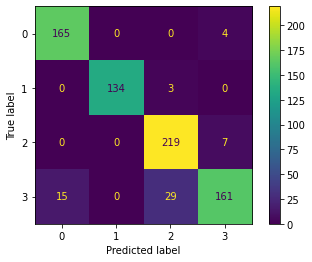

In [23]:
# Better visualize how the model is performing through a confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()


In [24]:
# Dropping time and CO2 from the sets
X = df.drop(['Room_Occupancy_Count', 'S5_CO2', 'Time'], axis=1)
y = df['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [25]:
# Training a new model
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
y_pred = gnb2.predict(X_test)

In [26]:
# Obtaining accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9131614654002713


In [27]:
# Once again checking for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb2.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb2.score(X_test, y_test)))

Training set score: 0.8841
Test set score: 0.9132


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


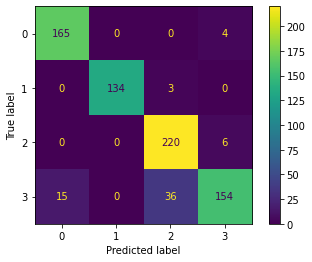

In [28]:
plot_confusion_matrix(gnb2, X_test, y_test)  
plt.show()